<a href="https://colab.research.google.com/github/TrentDodge/SQC/blob/main/Lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import math
import random
import scipy
import statistics
import numpy as np
import scipy.stats
from scipy import stats
from scipy.stats import f_oneway
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as mc


In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/TrentDodge/SQC/main/HangTime.csv', sep=',', na_values=".")
data

,Trial,A,B,C,HangTime,Unnamed: 5,Unnamed: 6
0,1,-1,-1,-1,1.70,NaN,NaN
1,2,-1,-1,-1,1.78,NaN,NaN
2,3,-1,-1,-1,1.35,NaN,NaN
3,4,-1,-1,-1,1.88,NaN,NaN
4,5,-1,-1,-1,1.78,NaN,NaN
...,...,...,...,...,...,...,...
75,76,1,1,1,1.39,NaN,NaN
76,77,1,1,1,1.31,NaN,NaN
77,78,1,1,1,1.25,NaN,NaN
78,79,1,1,1,1.39,NaN,NaN


In [4]:
del data['Unnamed: 5']
del data['Unnamed: 6']
data

,Trial,A,B,C,HangTime
0,1,-1,-1,-1,1.70
1,2,-1,-1,-1,1.78
2,3,-1,-1,-1,1.35
3,4,-1,-1,-1,1.88
4,5,-1,-1,-1,1.78
...,...,...,...,...,...
75,76,1,1,1,1.39
76,77,1,1,1,1.31
77,78,1,1,1,1.25
78,79,1,1,1,1.39


In [5]:
df=data #df means data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Trial     80 non-null     int64  
 1   A         80 non-null     int64  
 2   B         80 non-null     int64  
 3   C         80 non-null     int64  
 4   HangTime  80 non-null     float64
dtypes: float64(1), int64(4)
memory usage: 3.2 KB


In [6]:
model1 = ols('HangTime ~ A + B + C + A:B + A:C + B:C + (A:B:C)', data=df).fit()
aov_table = sm.stats.anova_lm(model1, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
A,0.804005,1.0,37.860770,3.856467e-08
B,0.741125,1.0,34.899737,1.057483e-07
C,0.963605,1.0,45.376369,3.375483e-09
A:B,0.087120,1.0,4.102500,4.652741e-02
A:C,0.124820,1.0,5.877801,1.784457e-02
B:C,0.001620,1.0,0.076286,7.831861e-01
A:B:C,0.002645,1.0,0.124554,7.251784e-01
Residual,1.528980,72.0,NaN,NaN


In [7]:
from numpy.lib.index_tricks import CClass
AA=df[['A']].to_numpy()
BB=df[['B']].to_numpy()
CC=df[['C']].to_numpy()
AB=AA*BB
AC=AA*CC
BC=BB*CC
ABC=AA*BB*CC

In [8]:
df['AB']=AB
df['AC']=AC
df['BC']=BC
df['ABC']=ABC
X=df[['A', 'B', 'C', 'AB','AC','BC']]
X = sm.add_constant(X) # adding a constant
X
Y=df[['HangTime']]
Y

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,HangTime
0,1.70
1,1.78
2,1.35
3,1.88
4,1.78
...,...
75,1.39
76,1.31
77,1.25
78,1.39


In [9]:
model1 = sm.OLS(Y, X)
res1=model1.fit()
print(res1.summary())

                            OLS Regression Results                            
Dep. Variable:               HangTime   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     21.62
Date:                Wed, 05 Oct 2022   Prob (F-statistic):           1.95e-14
Time:                        03:47:49   Log-Likelihood:                 44.713
No. Observations:                  80   AIC:                            -75.43
Df Residuals:                      73   BIC:                            -58.75
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5960      0.016     98.551      0.0

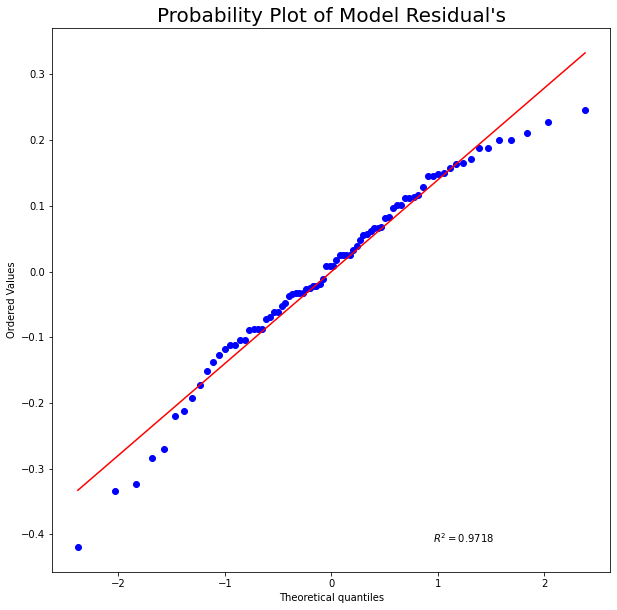

In [10]:
res1.resid
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(res1.resid, plot= plt, rvalue= True)
ax.set_title("Probability Plot of Model Residual's", fontsize= 20)
ax.set

plt.show()

In [12]:
res1.resid

0     0.06625
1     0.14625
2    -0.28375
3     0.24625
4     0.14625
       ...   
75   -0.03225
76   -0.11225
77   -0.17225
78   -0.03225
79    0.15775
Length: 80, dtype: float64

In [13]:
eij1 = res1.resid
eij1

0     0.06625
1     0.14625
2    -0.28375
3     0.24625
4     0.14625
       ...   
75   -0.03225
76   -0.11225
77   -0.17225
78   -0.03225
79    0.15775
Length: 80, dtype: float64

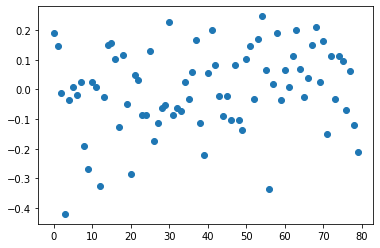

In [14]:
N = len(eij1)
c = list(range(0, N))
order = random.sample(c, N)
x = range(0,N) 
y = eij1[order] 

plt.scatter(x, y)